In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as st
import seaborn as sns

In [2]:
data = pd.read_csv('https://github.com/Intelligent-Systems-Phystech/psad-2020/raw/master/lab/lab2/2.4.csv')
data.head()

,mitsubishi,audi,bmw
0,51,40,106
1,67,77,78
2,33,66,78
3,140,84,95
4,96,59,87


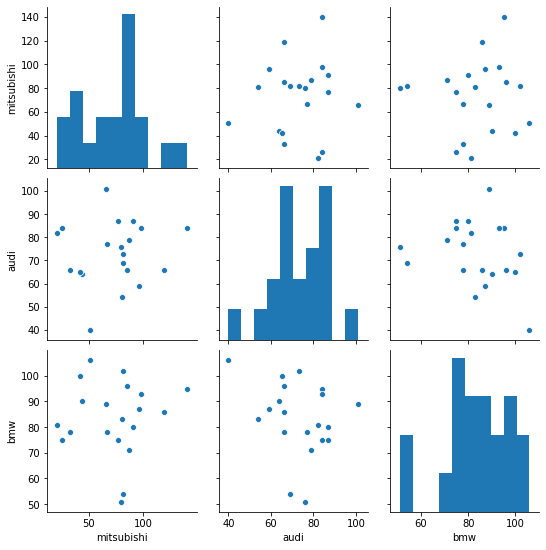

In [3]:
_ = sns.pairplot(data)

In [4]:
data.describe()

,mitsubishi,audi,bmw
count,20.00000,20.000000,20.000000
mean,73.40000,73.150000,83.500000
std,30.43094,13.830839,14.321497
min,21.00000,40.000000,51.000000
25%,49.25000,65.750000,77.250000
50%,80.50000,74.500000,84.500000
75%,88.00000,84.000000,93.500000
max,140.00000,101.000000,106.000000


# недостаток

влияет ли марка автомобиля на среднюю скорость движения?

на самом деле не понятно как средняя скорость движения влияет на то превышает человек максимальную скорость или нет, ну давайте доверять правительсву и рассмотрим именно такую задачу 

так же понятно что равенсво распределений и влияние марки автомобиля на среднюю скорость это не одно и тоже. Отвержение гипотезы равенства распределений не даст нам ответа на вопрос правительства 

# метод

предлагается воспользоваться однофакторным дисперсионным анализом 

хотим оценить влияние марки автомобиля на на среднюю скорость

используем критерий Фишера (Средние значения 𝑋 во всех 𝐾 выборках одинаковы)

# формальная постановка задачи

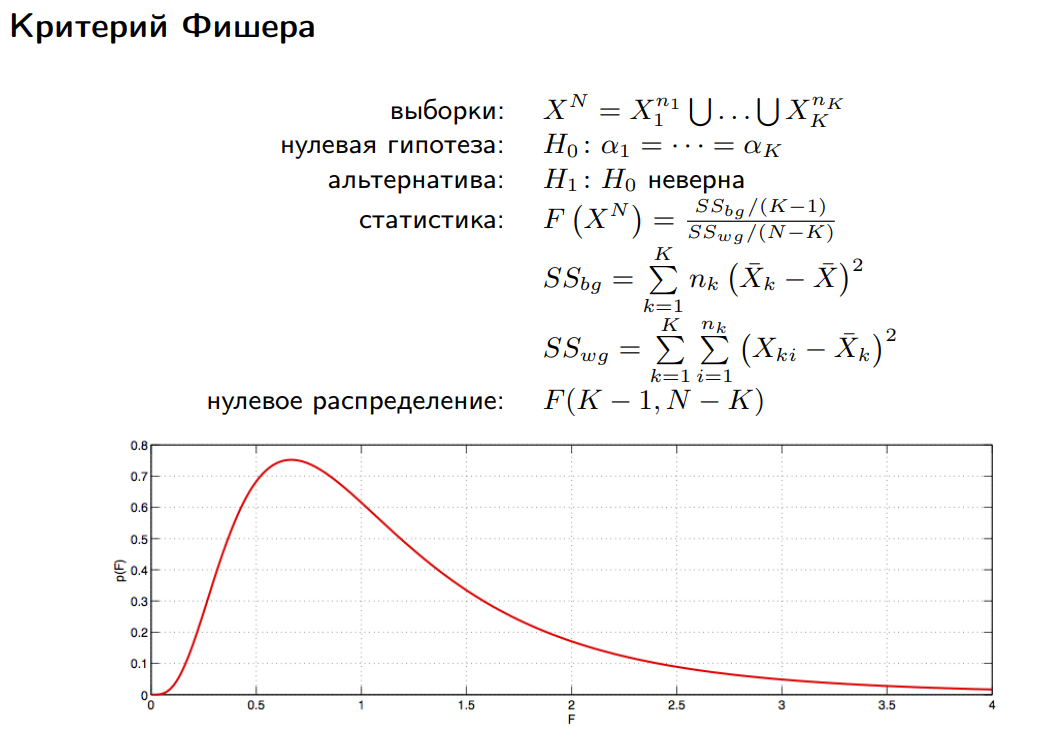

или в наших обозначениях

1. выборки : $X^N = X^{20}_1 \cup  X^{20}_2 \cup X^{20}_3$
2. нулевая гипотеза : $H_0 : \alpha_1 =  \alpha_2 =  \alpha_3$ 
3. альтернатива : аналогично
4. статистика : аналогично
5. нулевое распределение : $F(2,57)$

# подсчеты

In [6]:
mit = data['mitsubishi']
audi = data['audi']
bmw = data['bmw']

In [9]:
all_auto = data.values.flatten()
all_auto.shape

(60,)

In [15]:
m = all_auto.mean()

In [16]:
mit.mean()

73.4

In [18]:
bg = 20*((mit.mean() - m)**2 + (audi.mean() - m)**2 + (bmw.mean() - m)**2) 
print(bg)

1394.6333333333318


In [19]:
mit_st = ((mit- mit.mean())**2).sum()
audi_st = ((audi- audi.mean())**2).sum()
bmw_st = ((bmw- bmw.mean())**2).sum()

In [21]:
wg = mit_st + audi_st + bmw_st
print(wg)

25126.350000000002


In [25]:
F = (bg/ 2 ) / (wg/57)
print(F)

1.5818871423823975


In [27]:
p_value = 1 - st.f.cdf(F , 2 , 57)
print(p_value)

0.2144785173954088


получили что данные гипотезе не противоречат, а значит правительству временно придется придержать свою инициативную деятельность